In [ ]:
# Load needed packages

from week_13_python.utils import denoise, load_single_audio
import sounddevice as sd
import matplotlib.pyplot as plt
import numpy as np
from pesq import pesq

In [ ]:
# Load audio
audio_file = r".\exercise_description\data\11\lizard.wav"
clean_aud = load_single_audio(audio_file)

# Generate random noise sequence and add to clean signal
noise = np.random.randn(len(clean_aud))
noisy_aud = clean_aud + 0.5 * noise
noisy_aud = noisy_aud[np.newaxis, ]


In [ ]:
# Load pretrained model
log = r"[YOUR PATH HERE]" # Complete this line

# Denoise signal
estimated_aud = denoise(log, noisy_aud)

In [10]:
# Play the original clean audio sample
clean_aud_scale = (clean_aud * 2000).astype(np.int16)
sd.play(clean_aud_scale, 8000)

In [11]:
# Play the original noisy audio sample
noisy_aud_scale = (noisy_aud[0] * 2000).astype(np.int16)
sd.play(noisy_aud_scale, 8000)

In [12]:
# Play the estimated cleaned audio from the model
estimated_aud_scale = np.array(estimated_aud[-1].squeeze() * 2000).astype(np.int16)
sd.play(estimated_aud_scale, 8000)

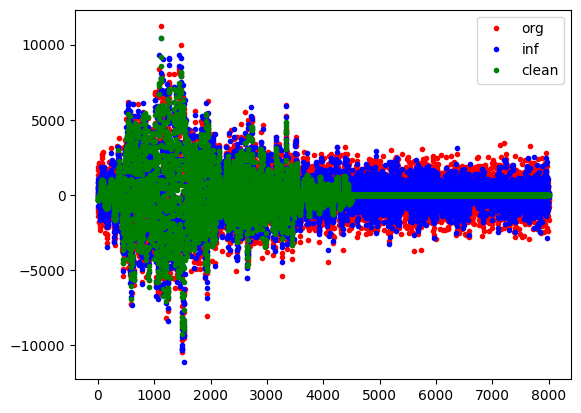

In [13]:
# Look at the spectral differences between the
# original noisy signal and the estimated clean 
# signal and the original clean audio
plt.plot(noisy_aud_scale, 'r.', label = "org")
plt.plot(estimated_aud_scale, 'b.', label = "inf")
plt.plot(clean_aud_scale, 'g.', label = "clean")
plt.legend()
plt.show()

In [ ]:
# Calculate the PESQ score of the output (see: https://en.wikipedia.org/wiki/Perceptual_Evaluation_of_Speech_Quality )

sr = 8_000
org_sound_quality = pesq(sr, clean_aud_scale, noisy_aud_scale, 'nb')
model_sound_quality = pesq(sr, clean_aud_scale, estimated_aud_scale, 'nb')

print(f"The noise level of the noisy signal is: \t{org_sound_quality}")
print(f"The noise level of the denoised signal is: \t{model_sound_quality}")
print(f"An improvement of {org_sound_quality - model_sound_quality} points")

1.4559595584869385
1.4105818271636963
